# Background and Purpose: 
#### Airbnb is an online marketplace where customers can book homestays and experiences across various countries. Each time a guest stays at an accommodation, they are encouraged to leave a review and score their experience.

#### The objective of this model is to predict review scores for stays in the dataset, thereby better informing hosts about the factors that contribute to customer satisfaction. Predicting review scores can improve guest experience, increase host ratings, boost bookings, enable personalized experiences, enhance operational efficiency, provide a competitive advantage, and contribute to a safer, more trustworthy platform for both guests and hosts.

## Data Exploration

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Reading and Viewing the  Data

In [2]:
df =  pd.read_csv('/kaggle/input/airbnb/listings.csv', header = 0,skiprows = lambda i: i>0 and random.random() > 0.02)
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,67851,https://www.airbnb.com/rooms/67851,20191105115249,2019-11-06,Modern studio flat in London fields,Modern studio flat in the heart of East London...,Stylish modern studio apartment in a highly so...,Modern studio flat in the heart of East London...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3919655/55...,NaN,235606,https://www.airbnb.com/users/show/235606,Ben,2010-09-15,"London, England, United Kingdom",I look forward to welcoming you to my apartme...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/ed9d0c96-8...,https://a0.muscache.com/im/pictures/ed9d0c96-8...,LB of Hackney,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"London, United Kingdom",Hackney,Hackney,NaN,London,NaN,E8 3PE,London,"London, United Kingdom",GB,United Kingdom,51.54117,-0.05867,f,Apartment,Entire home/apt,2,1.0,1,1.0,Real Bed,"{TV,Wifi,Kitchen,""Hot tub"",Heating,Washer}",NaN,$76.00,NaN,NaN,NaN,$30.00,1,$0.00,14,31,3,14,31,31,13.9,31.0,a week ago,t,2,10,10,10,2019-11-06,30,0,2012-12-02,2018-02-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.36
1,139142,https://www.airbnb.com/rooms/139142,20191105115249,2019-11-06,Beautiful 1 bed flat with terrace,"My quiet,airy, centrally located flat has an e...","Welcome! Fantastic, newly modernised one bed f...","My quiet,airy, centrally located flat has an e...",none,NaN,NaN,Public transport to all parts of London is a t...,NaN,I'll be present when you arrive to show you al...,The only rule I have is to be as respectful an...,NaN,NaN,https://a0.muscache.com/im/pictures/1915062/9d...,NaN,678760,https://www.airbnb.com/users/show/678760,Andrew,2011-06-08,"London, England, United Kingdom",(Website hidden by Airbnb) . . . . Trustworthy...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/678760/profil...,https://a0.muscache.com/im/users/678760/profil...,LB of Islington,1,1,"['email', 'phone', 'reviews']",t,f,"Islington, England, United Kingdom",LB of Islington,Islington,NaN,Islington,England,N7 0,London,"Islington, United Kingdom",GB,United Kingdom,51.55719,-0.12932,t,Apartment,Entire home/apt,2,1.5,1,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Breakfast...",NaN,$70.00,NaN,NaN,NaN,$50.00,1,$

##### We can already see we have mixed data types, missing values, etc. So let's create a custom function called df_explore that shows the missing data, number of unique values, and the data type for each feature in our dataframe

In [3]:
def df_explore(df):
    missing = pd.DataFrame((df.isna().sum()/df.shape[0])*100).reset_index().rename(columns={'index': 'column',0:'%_missing'}).sort_values(by = '%_missing',ascending=False)
    nunique = pd.DataFrame(df.nunique()).reset_index().rename(columns={'index': 'column',0:'nunique'}).sort_values(by = 'nunique',ascending=False)
    dtypes = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index': 'column',0:'dtype'})
    return pd.merge(pd.merge(dtypes,missing,on='column'),nunique,on='column',how='left').sort_values(by='%_missing',ascending=False).sort_values(by = 'nunique', ascending = False)
print(df.shape)
df_explore(df)

(1723, 106)


,column,dtype,%_missing,nunique
0,id,int64,0.000000,1723
1,listing_url,object,0.000000,1723
17,picture_url,object,0.000000,1722
4,name,object,0.058038,1719
58,amenities,object,0.000000,1690
7,description,object,2.901915,1670
49,longitude,float64,0.000000,1666
5,summary,object,4.817179,1633
48,latitude,float64,0.000000,1627
19,host_id,int64,0.000000,1594


# Data Preparation For Modeling
#### In this step, we will begin preparing our data for building a machine-learning model.

## Formatting features
#### Based on the df_explore function's output, let's deal with the features that we can transform

##### First we can see that there are some features representing currency with a $ sign so we can convert these to numeric

In [4]:
df[['weekly_price','security_deposit','price','cleaning_fee','extra_people','monthly_price']] = df[['weekly_price','security_deposit','price','cleaning_fee','extra_people','monthly_price']].replace(r'[\$,]', '', regex=True).astype(float)

##### We can also see there is % sign for host_response_rate

In [5]:
df['host_response_rate'] = df['host_response_rate'].replace(r'[\%,]', '', regex=True).astype(float)

##### We have 4 features that should be dates, however they can be further transformed into more insightful features.

In [6]:
# we notice from our df_explore function that both calendar_last_scraped and last_scraped only have 2 values, so they won't provide us much insight
df = df.drop(['calendar_last_scraped','last_scraped'],axis=1)

# Simarily for the 'host_since' feature, we can subtract by today's date and get the amount of days since the host started hosting 
df['host_since_days'] = (pd.to_datetime(datetime.today().date()) - pd.to_datetime(df['host_since'])).dt.days

# For 'first_review' and 'last_review' we can subtract them and get the amount of days since the first and last review

df['days_between_first_last_review'] = (pd.to_datetime(df['last_review']) - pd.to_datetime(df['first_review'])).dt.days

# Finally we can drop 'first_review','last_review', and 'host_since' features
df = df.drop(['first_review','last_review','host_since'],axis=1)

##### Let's look at the categorical features and filter on features that have T/F boolean values. We can convert them to 0 and 1 instead so it's easier for our model later

In [7]:
df2 = df.copy()
t_f_mappings = {'t':1, 'f':0}

df2[df2.columns[df2.isin(['t']).any() | df2.isin(['f']).any()]] = df2[df2.columns[df2.isin(['t']).any() | df2.isin(['f']).any()]].replace(t_f_mappings)

df2[df.columns[df.isin(['t']).any() | df.isin(['f']).any()]].head(3)

/tmp/ipykernel_17/20606462.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[df2.columns[df2.isin(['t']).any() | df2.isin(['f']).any()]] = df2[df2.columns[df2.isin(['t']).any() | df2.isin(['f']).any()]].replace(t_f_mappings)


,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,0,1,1,0,1,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0


##### Filtering for categorical values that have a disproportionate value counts. If so, this will determine if we can remove.

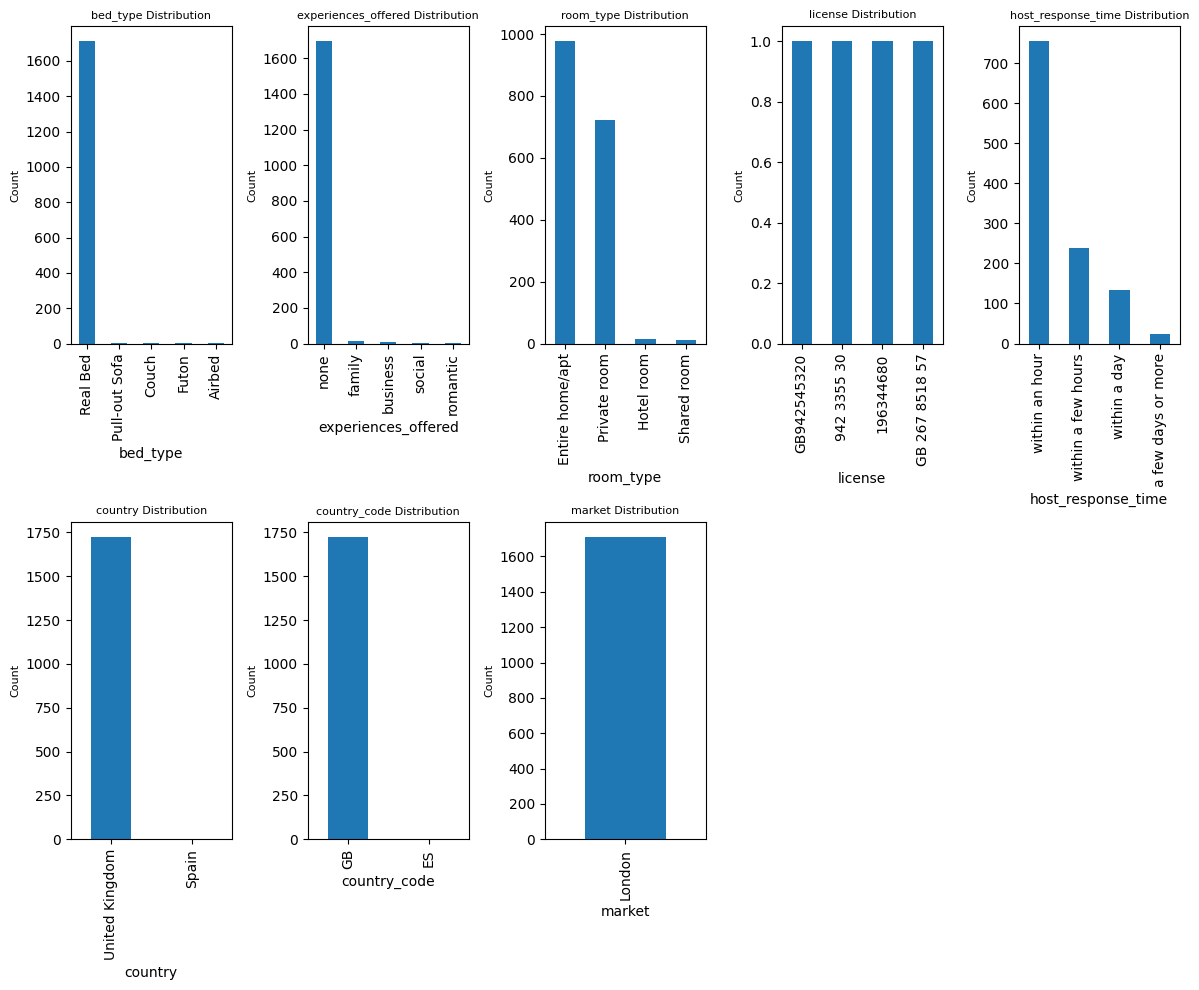

In [8]:
# Listings columns to plot
columns_to_plot =  df_explore(df2).loc[(df_explore(df2)['dtype'] == 'object') & (df_explore(df2)['nunique'] <7)]['column'].values

# Setting the number of rows and columns
ncols = 5  # Number of columns
nrows = (len(columns_to_plot) + ncols - 1) // ncols  # Calculate the number of rows dynamically

# Creating a plot with in a grid layout
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))
axes = axes.flatten()  # Flattening the axes array to make indexing easier

# Looping through the columns and the corresponding axes to plot each value count
for idx, col in enumerate(columns_to_plot):
    df2[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution',fontsize=8)
    axes[idx].set_xlabel(col,fontsize=10)
    axes[idx].set_ylabel('Count',fontsize=8)

# Hiding unused axes if there are fewer plots than grid cells
for ax in axes[len(columns_to_plot):]:
    ax.set_visible(False)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

##### from the above we can already see that many columns have just one value or heavily skewed to one value. These features are very likely not be useful for predictive power due to lack of variation. So we can remove them completely

In [9]:
df3 = df2.copy()
df3 = df3.drop(df3.loc[:, df3.nunique() == 1].columns, axis=1)

In [10]:
df_explore(df3)

,column,dtype,%_missing,nunique
0,id,int64,0.000000,1723
1,listing_url,object,0.000000,1723
15,picture_url,object,0.000000,1722
2,name,object,0.058038,1719
54,amenities,object,0.000000,1690
5,description,object,2.901915,1670
45,longitude,float64,0.000000,1666
3,summary,object,4.817179,1633
44,latitude,float64,0.000000,1627
18,host_url,object,0.000000,1594


## Data Cleaning
##### Now that our features are formatted we need to deal with missing data
##### Most ML models cannot work with missing features so we have 3 options:

##### • Remove the whole feature.
##### • Replace the missing value with another value that aligns with the features data representation
##### • Impute the feature by setting the missing values to zero, the mean, the median, etc.

##### So let's look to see if we can perform the first option - removing the whole feature
###### It is a safe assumption, if a feature has more than 75% missing data imputation will not help it of any significance in our model.
###### So we can start by is setting a threshold of 75% for the amount of missing data a column can have and remove it

In [11]:
def drop_dups(df):
# Calculate the percentage of missing values in each column
  missing_percentages = df.isnull().mean(axis=0)

  # Select columns with missing data exceeding the threshold
  columns_to_remove = missing_percentages[missing_percentages > 0.75].index.tolist()

  # Return a copy of the DataFrame with the identified columns removed
  return df.drop(columns_to_remove, axis=1).copy()
df3_clean1 = drop_dups(df3)

#### Imputation
#### Now that we've removed some features, we can use the imputation method on the numeric columns to compute the median value and use it to fill the missing values. 

##### Since we can only impute values that are numeric we will filter on them below by dropping the categorical features and saving it as a new dataframe called df2_clean1_num


In [12]:
df3_clean1_num = df3_clean1.drop(df3_clean1.select_dtypes(include=['object']).columns, axis=1)

##### Now we perform the imputation using SimpleImputer

In [13]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df3_clean1_num)
X = imputer.transform(df3_clean1_num)
df3_clean1_imputed = pd.DataFrame(X, columns=df3_clean1_num.columns)
df3_clean1_imputed.head()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,days_between_first_last_review
0,67851.0,235606.0,100.0,0.0,1.0,1.0,1.0,1.0,51.54117,-0.05867,0.0,2.0,1.0,1.0,1.0,76.0,100.0,30.0,1.0,0.0,14.0,31.0,3.0,14.0,31.0,31.0,13.9,31.0,2.0,10.0,10.0,10.0,30.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.36,5159.0,1906.0
1,139142.0,678760.0,100.0,0.0,1.0,1.0,1.0,0.0,51.55719,-0.12932,1.0,2.0,1.5,1.0,1.0,70.0,100.0,50.0,1.0,0.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0.0,12.0,42.0,317.0,101.0,3.0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.01,4893.0,2947.0
2,249423.0,1306637.0,100.0,0.0,1.0,1.0,1.0,1.0,51.52963,-0.11939,0.0,4.0,1.0,1.0,3.0,90.0,200.0,50.0,2.0,15.0,3.0,60.0,3.0,90.0,60.0,60.0,15.0,60.0,23.0,53.0,83.0,83.0,148.0,14.0,83.0,9.0,9.0,9.0,10.0,10.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.53,4761.0,2818.0
3,81635.0,443041.0,90.0,1.0,3.0,3.0,1.0,1.0,51.52842,-0.11141,0.0,2.0,1.5,1.0,1.0,99.0,0.0,45.0,1.0,90.0,4.0,730.0,4.0,4.0,730.0,730.0,4.0,730.0,11.0,34.0,58.0,323.0,54.0,5.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.70,4978.0,2318.0
4,257219.0,1353674.0,100.0,0.0,3.0,3.0,1.0,0.0,51.52984,-0.08155,1.0,4.0,1.0,1.0,1.0,40.0,100.0,30.0,1.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.61,4748.0,229.0


##### Let's concatenate the imputed features back to the dataframe

In [14]:

df4 = pd.concat([df3_clean1.select_dtypes(include=['object','datetime64[ns]']), df3_clean1_imputed], axis=1)



#### Looks like all of our numeric features have no missing data now, let's take a look at the categorical variables that will eventually become dummy variables. Before we convert them, let's take another look at the categorical variables and perform feature engineering

#### For some of the features with many unique values that will eventually become dummy variables we can interpret them as binary - 0 being a provided value (i.e. the host did not provide house rules) and 1 being provided information. 
#### Specifically for the features - 'notes', 'access', 'house_rules','interaction','host_about','neighborhood_overview','transit','space', 'summary','description' and 'host_verifications'

In [15]:
# Replacing any null values with 0 and any existing value as 1
def replace_null_with_zeros(df, column_names):
    for column_name in column_names:
        if column_name in df.columns:
            df[column_name] = df[column_name].apply(lambda x: 0 if pd.isnull(x) else 1)
    return df

df4 = df4.copy()
df5 = replace_null_with_zeros(df4,['notes', 'access','house_rules','interaction','host_about','neighborhood_overview','transit','space',
     'summary','description','host_verifications', 'amenities'])

##### Let's look at the remaning categorical variables that have missing data

In [16]:
df_explore(df5.select_dtypes(include=['object'])).sort_values(by = '%_missing', ascending = False)

,column,dtype,%_missing,nunique
7,host_response_time,object,33.197911,4
10,host_neighbourhood,object,22.983169,159
15,state,object,19.152641,16
16,zipcode,object,2.147417,1497
14,city,object,0.290192,78
6,host_location,object,0.174115,175
1,name,object,0.058038,1719
0,listing_url,object,0.000000,1723
13,neighbourhood_cleansed,object,0.000000,33
18,country_code,object,0.000000,2


In [17]:
# Since 'host_response_time','state', and 'host_neighbourhood' have at least 20% missing data, we can replace the null values with 'none' and re-visit them when we create dummy variables
df5[['host_response_time','state','host_neighbourhood']] = df5[['host_response_time','state','host_neighbourhood']].fillna('none')

In [18]:
df_explore(df5.select_dtypes(include=['object'])).sort_values(by = '%_missing', ascending = False)

,column,dtype,%_missing,nunique
16,zipcode,object,2.147417,1497
14,city,object,0.290192,78
6,host_location,object,0.174115,175
1,name,object,0.058038,1719
0,listing_url,object,0.000000,1723
13,neighbourhood_cleansed,object,0.000000,33
18,country_code,object,0.000000,2
21,room_type,object,0.000000,4
2,experiences_offered,object,0.000000,5
22,bed_type,object,0.000000,5


In [19]:
# As for the rest since we have very few missing data  (<2%) so we can remove the null rows

df6 = df5.dropna(axis = 0)

## Dummy Variables

#### When we look at all the  categorical variables that we would convert to dummy variables we see that many of them still have a large amount of values so we can perform a technique of feature engineering that uses variance to determine if they will be significant in terms of prediction. One technique is called Variance Thresholding. We calculate the variance for each categorical feature and if it is less than or equal to 0.3 then we have evidence to remove it.
### Variance Thresholding for Feature Selection

In [20]:
columns_to_check = df6.select_dtypes(include = 'object').columns
cat_columns_to_drop = []
for col in columns_to_check:
# Create dummy variables for the current column
    dummies = pd.get_dummies(df6[[col]])

# Calculate the variance of the dummy variables
    variance = dummies.var()
    var_mean = variance.mean()

# Print the variance for each dummy variable
    #print(f"Variance of dummy variables for '{col}':\n{var_mean}\n")
    if var_mean <= 0.1:
        cat_columns_to_drop.append(col)
        print(f"'{col}' has variance =  {var_mean} and will be dropped.")

df7 = df6.drop(columns=cat_columns_to_drop)


'listing_url' has variance =  0.000595592614651578 and will be dropped.
'name' has variance =  0.0005966574405418967 and will be dropped.
'experiences_offered' has variance =  0.006367658824105669 and will be dropped.
'picture_url' has variance =  0.0005959471335614258 and will be dropped.
'host_url' has variance =  0.0006445947441573542 and will be dropped.
'host_name' has variance =  0.0009188667018277549 and will be dropped.
'host_location' has variance =  0.004469033463740643 and will be dropped.
'host_thumbnail_url' has variance =  0.0006466725743396852 and will be dropped.
'host_picture_url' has variance =  0.0006466725743396852 and will be dropped.
'host_neighbourhood' has variance =  0.005933169678746583 and will be dropped.
'street' has variance =  0.0061964348209424275 and will be dropped.
'neighbourhood' has variance =  0.007289188816378424 and will be dropped.
'neighbourhood_cleansed' has variance =  0.028532192579979125 and will be dropped.
'city' has variance =  0.0071062

In [21]:
df_explore(df7)

,column,dtype,%_missing,nunique
14,id,float64,0.0,1679
23,longitude,float64,0.0,1627
22,latitude,float64,0.0,1589
15,host_id,float64,0.0,1551
64,host_since_days,float64,0.0,1194
65,days_between_first_last_review,float64,0.0,682
63,reviews_per_month,float64,0.0,341
45,availability_365,float64,0.0,310
29,price,float64,0.0,264
46,number_of_reviews,float64,0.0,131


#### Now that every column has been formatted, engineered, and cleaned we can create our dummy variables

In [22]:
df7_dummies = pd.get_dummies(df7.select_dtypes(include=['object']), dtype = int)
df8 = pd.concat([df7.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']),df7_dummies], axis=1)

# Feature Selection
#### Feature selection is the process of identifying and removing redundant features from our data frame in order to improve the performance of a machine learning model.

## Collinearity and Removing Redundancies
#### Collinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. This can lead to problems in interpreting the results of the model, as the coefficients of the correlated variables may be unstable and difficult to interpret. So we want to remove the subset of variables that are highly correlated with each other

### Diagonal Heatmap
##### We will draw a diagonal heatmap to visualize the correlations and create a mask (empty looking line) can be used to identify variables that are highly correlated and may need to be removed from the model.

<Axes: >

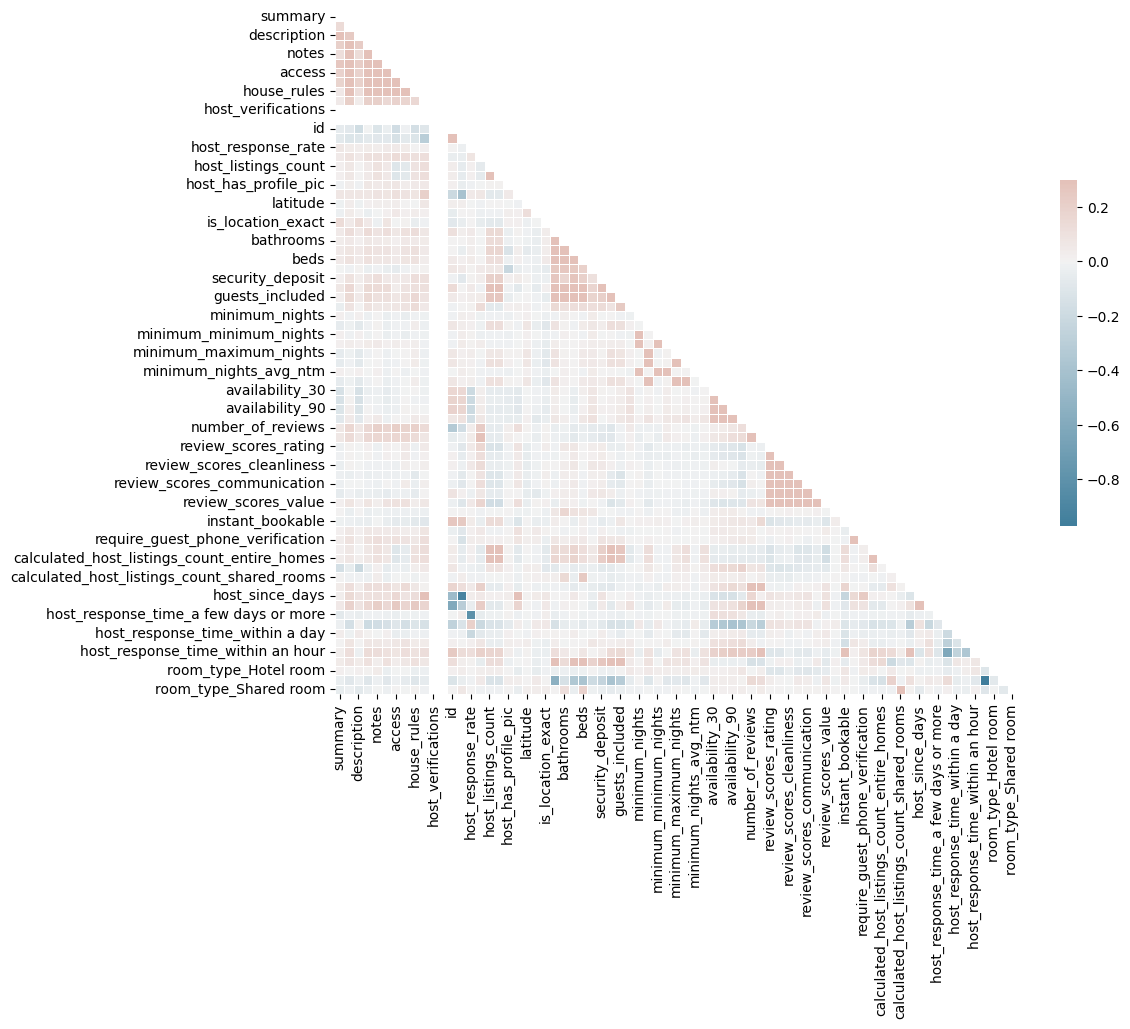

In [23]:
import seaborn as sns
corr = df8.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### As we can see our mask acted on host_verifications, as we can see below it has many zeros, so we can drop this one.

In [24]:
print(df8['host_verifications'].describe())

df9 = df8.drop(['host_verifications'], axis=1)

count    1679.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: host_verifications, dtype: float64


### Finding and removing redundant Pairs
##### Below we will create functions that will determine redundant pairs and remove them

In [25]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations")
print(get_top_abs_correlations(df9, 20))

Top Absolute Correlations
host_listings_count             host_total_listings_count                      1.000000
host_total_listings_count       calculated_host_listings_count                 0.995899
host_listings_count             calculated_host_listings_count                 0.995899
maximum_maximum_nights          maximum_nights_avg_ntm                         0.994875
minimum_minimum_nights          minimum_nights_avg_ntm                         0.994346
minimum_nights                  minimum_minimum_nights                         0.992354
calculated_host_listings_count  calculated_host_listings_count_entire_homes    0.991897
host_listings_count             calculated_host_listings_count_entire_homes    0.989550
host_total_listings_count       calculated_host_listings_count_entire_homes    0.989550
minimum_maximum_nights          maximum_nights_avg_ntm                         0.989353
minimum_nights                  minimum_nights_avg_ntm                         0.988678
minimu

#### We can see that we have pairs that have high correlations, which might cause collinearity. Which requires us to use multi-collinearity to remove them

## Multicollinearity Check with VIF
##### Variance Inflation Factor(VIF) measures how much the collinearity of a variable affects your regression model.  We will remove any features with a VIF score above 20, as it shows a high level of multicollinearity.

##### We will create a custom function that calculates VIF for each feature

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df10 = df9.copy()
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df10[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [27]:
# dropping our target variable
features = df10.drop(columns=['review_scores_rating']).columns.to_list()
vif_data = compute_vif(features)
vif_data

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,amenities,0.000000e+00
1,latitude,1.053688e+00
2,requires_license,1.055231e+00
3,longitude,1.078266e+00
4,is_location_exact,1.106550e+00
5,host_has_profile_pic,1.122090e+00
6,extra_people,1.173255e+00
7,price,1.234392e+00
8,host_identity_verified,1.271617e+00
9,host_is_superhost,1.273993e+00


#### Dropping The Features
##### We will drop the highest VIF score by writing the while loop. It will first define the highest VIF features and then remove them.

In [28]:
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove host_listings_count


/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


I will remove room_type_Entire home/apt


/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


I will remove host_response_time_within an hour
I will remove amenities
I will remove latitude
I will remove maximum_nights_avg_ntm
I will remove calculated_host_listings_count
I will remove review_scores_communication
I will remove minimum_nights_avg_ntm
I will remove review_scores_accuracy
I will remove review_scores_location
I will remove review_scores_checkin
I will remove host_has_profile_pic
I will remove review_scores_value
I will remove maximum_maximum_nights
I will remove host_response_rate
I will remove description
I will remove calculated_host_listings_count_entire_homes
I will remove minimum_minimum_nights
I will remove review_scores_cleanliness
I will remove availability_60
I will remove maximum_nights
I will remove host_since_days


,feature,VIF
0,requires_license,1.052107
1,room_type_Hotel room,1.073907
2,host_response_time_a few days or more,1.076482
3,calculated_host_listings_count_private_rooms,1.236969
4,host_response_time_within a day,1.304995
5,price,1.356128
6,host_is_superhost,1.426254
7,host_response_time_within a few hours,1.445171
8,extra_people,1.498056
9,require_guest_profile_picture,1.606103


## Gini's Importance

#### Let’s use Random Forest to determine the most important features using Gini's importance which calculates the importance of the features across all splits made by random forest regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df10[selected_features]
y = df10["review_scores_rating"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### we will calculate the importance of each feature in the DataFrame and store the feature names and their importance values in a dictionary. Allowing to select from the fraction of the DataFrame while applying the machine learning model later on

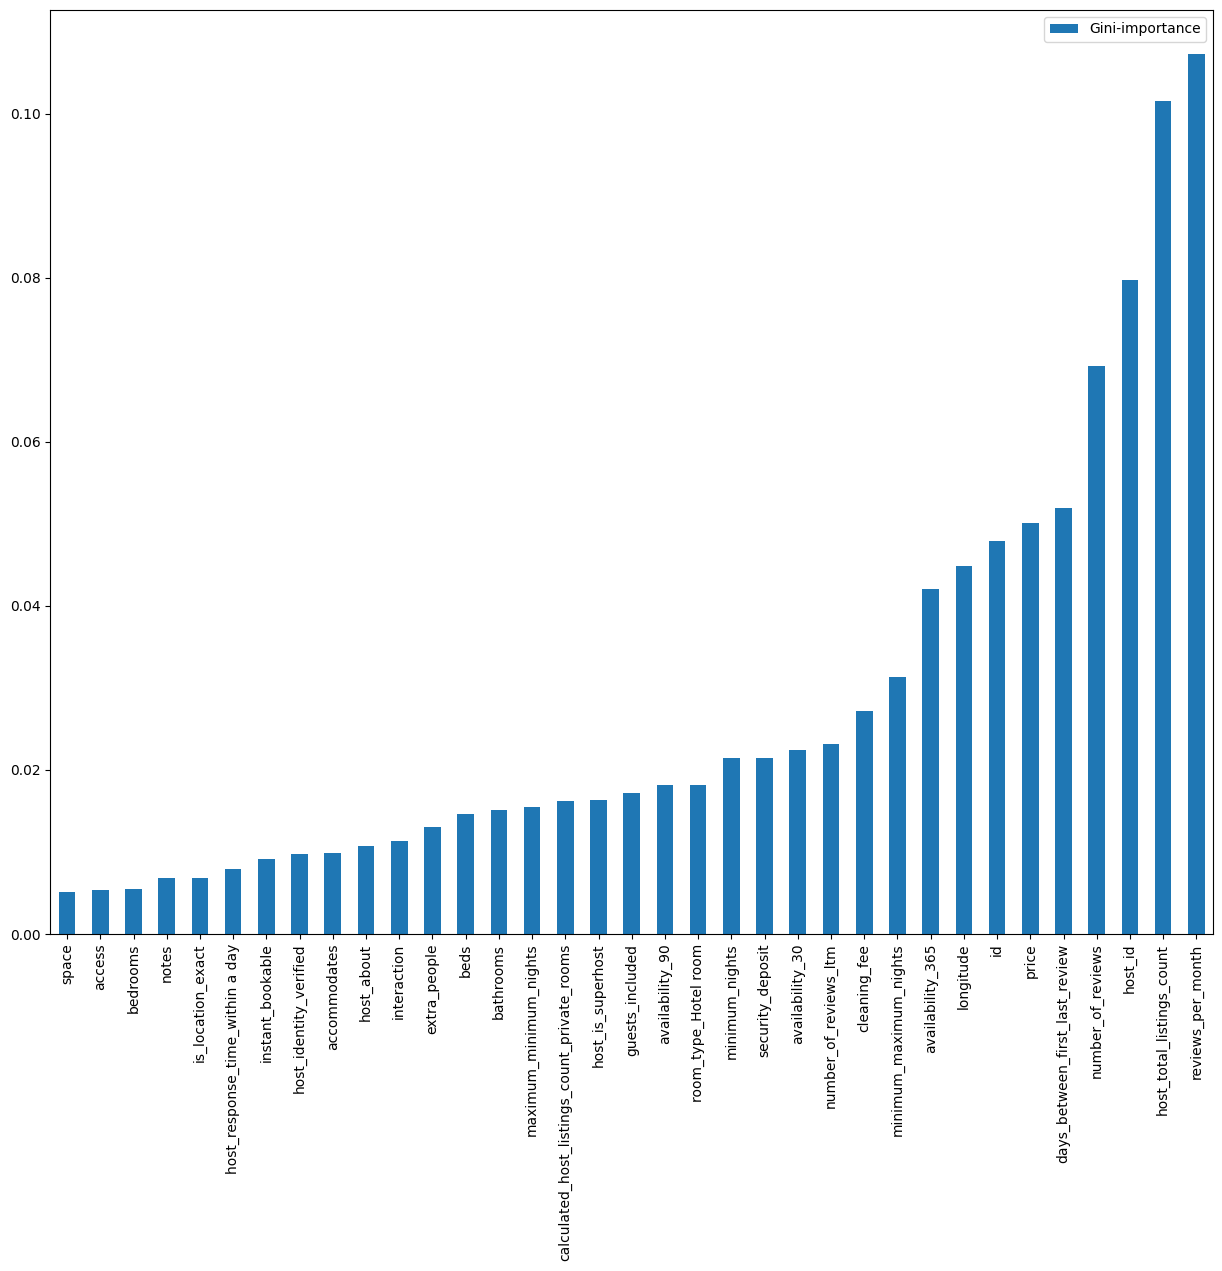

In [30]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {}# a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance#add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance')[-35:].plot(kind='bar', rot=90, figsize=(15,12))
importances.sort_values(by='Gini-importance')[-35:].index.tolist()
plt.show()

#### seems like days_between_first_last_review is our most important feature, followed by 'price', 'reviews_per_month',  

## PCA
#### Principle component analysis is a technique for reducing the dimensionality of a DataFrame by identifying and removing redundant features. It is a common technique to reduce dimensionality and eliminate multicollinearity.

/tmp/ipykernel_17/431105939.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


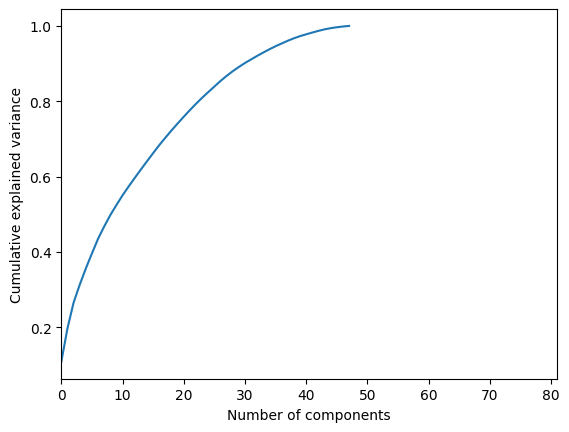

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train = X_train.values
X_Train = np.asarray(X_Train)
X_std = StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

##### About 20 features explain 80% of the data

## Scalers

#### Here we define a custom function that will allow us to apply different scalers in our machine-learning process. Scaling is the process of transforming variables to the same scale, which will help our algorithm works faster.

#### There are two common methods for doing this: Min-Max Scaler and Standard Scaler.

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))

    return X_scaled, y_scaled, X_scaler, y_scaler

#### Applying Scaler

In [33]:
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42)

#### Inverse Transform

In [34]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
# return RMSE with squared False
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print("Error = "'{}'.format(rmse_error)+" in " + model_name)

    return rmse_error, y_predict

# Machine Learning

## Modeling

### Below is a bespoke function that fit the models first, calculate and print the evaluation metrics, train and test error, with the trained model name with y_predict to then calculate these metrics for all of the models at once.

In [35]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model

    return trained_model, y_predict, train_error, test_error

##### Loading machine learning libraries

In [36]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

#### Below we will create dictionaries containing different parameters such as types of regression models, scalers, etc

In [37]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}

regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":  MLPRegressor(), }

# creating different sets of features: full dataset, 40, 20, and 10. The selection will be made according to Gini's index.
feature_sets = {
    "full dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(), }

scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}


## Results

#### To compare predictions with original values and calculate them between them, we use three for loops inside each other taking values from the dictionaries, then calculating the RMSE for each of our models and save the result in pred_dict

In [38]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            if scaler_name == "NotScale":
                X = df10[feature_set]
                y = df10["review_scores_rating"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)

            else:

                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are full dataset

Error = 8.478739922959702 in Ridge
Error = 9.18665160558347 in DecisionTree
Error = 8.508714195570606 in RandomForest
Error = 9.087308109931856 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2253
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 43
[LightGBM] [Info] Start training from score -0.009770
Error = 8.660841744962214 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Error = 10.894388843823466 in MLP
-----scaled with MinMax scaler-------- included columns are full dataset

Error = 8.46063756950845 in Ridge
Error = 9.404420066409507 in DecisionTree
Error = 8.582343135209415 in RandomForest
Error = 9.042887214749129 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2273
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 43
[LightGBM] [Info] Start training from score 0.918513
Error = 8.536655513888496 in LGBM
Error = 9.653159954297655 in MLP
-----scaled with NotScale-------- included columns are full dataset

Train error = 7.993557915961507 in Ridge
Test error = 8.46283703260487 in Ridge
Train error = 6.465240270152707 in DecisionTree
Test error = 8.978803859507215 in DecisionTree


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.79025e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 3.051836757583326 in RandomForest
Test error = 8.495389295712958 in RandomForest
Train error = 0.33981920142477756 in XGBoost
Test error = 9.036216696301038 in XGBoost
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2277
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 43
[LightGBM] [Info] Start training from score 93.481013
Train error = 2.776390076492895 in LGBM
Test error = 8.778451993369513 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 13510.185588133972 in MLP
Test error = 13138.424522125817 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 8.454995503298438 in Ridge
Error = 8.978803859507215 in DecisionTree
Error = 8.401585716965805 in RandomForest
Error = 8.942999238316894 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 39
[LightGBM] [Info] Start training from score -0.009770
Error = 8.615058799243487 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Error = 10.323877907246898 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_40

Error = 8.443319815381257 in Ridge
Error = 9.179750678745691 in DecisionTree
Error = 8.533131821932448 in RandomForest
Error = 8.946486161017294 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2262
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 39
[LightGBM] [Info] Start training from score 0.918513
Error = 8.60820679294904 in LGBM
Error = 9.802641453959621 in MLP
-----scaled with NotScale-------- included columns are selected_features_40

Train error = 8.074347037526126 in Ridge
Test error = 8.448628223008042 in Ridge
Train error = 6.465240270152707 in DecisionTree
Test error = 9.734705825130046 in DecisionTree


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.11756e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 2.9996202539501016 in RandomForest
Test error = 8.44942668525645 in RandomForest
Train error = 0.32099107916984176 in XGBoost
Test error = 8.946196802035795 in XGBoost
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 39
[LightGBM] [Info] Start training from score 93.481013
Train error = 2.771379787386089 in LGBM
Test error = 8.664169867597186 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 7444.435838794052 in MLP
Test error = 8363.637099522863 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_20

Error = 8.57636496506535 in Ridge
Error = 9.680966518864095 in DecisionTree
Error = 8.521205533843201 in RandomForest
Error = 8.937138817210215 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2101
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 19
[LightGBM] [Info] Start training from score -0.009770
Error = 8.65123185934843 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Error = 8.90922469795638 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_20

Error = 8.552671708413866 in Ridge
Error = 9.458211584924552 in DecisionTree
Error = 8.56415319459409 in RandomForest
Error = 8.947528554968025 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 19
[LightGBM] [Info] Start training from score 0.918513
Error = 8.782137394008913 in LGBM
Error = 9.3625723598703 in MLP
-----scaled with NotScale-------- included columns are selected_features_20

Train error = 8.17413598380697 in Ridge
Test error = 8.570083000291373 in Ridge
Train error = 6.783673682397381 in DecisionTree
Test error = 9.461591196910952 in DecisionTree


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07315e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 3.1470429690416983 in RandomForest
Test error = 8.526025737760376 in RandomForest
Train error = 0.42821068146188707 in XGBoost
Test error = 8.928443425633988 in XGBoost
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 19
[LightGBM] [Info] Start training from score 93.481013
Train error = 3.1413605682047887 in LGBM
Test error = 8.79394664228654 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 24278.001007379546 in MLP
Test error = 28579.41031620561 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_10

Error = 8.634679186184645 in Ridge
Error = 9.615021913003318 in DecisionTree
Error = 8.490980386072428 in RandomForest
Error = 8.968978300331946 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1787
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 10
[LightGBM] [Info] Start training from score -0.009770
Error = 8.624603193058565 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Error = 8.602196123692579 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_10

Error = 8.6181989713136 in Ridge
Error = 9.599011789758096 in DecisionTree
Error = 8.555835466844501 in RandomForest
Error = 8.98019096425652 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 10
[LightGBM] [Info] Start training from score 0.918513
Error = 8.516531399253235 in LGBM
Error = 9.171549968702637 in MLP
-----scaled with NotScale-------- included columns are selected_features_10

Train error = 8.379657964484785 in Ridge
Test error = 8.635286134607263 in Ridge
Train error = 6.451064192743099 in DecisionTree
Test error = 9.599011789758096 in DecisionTree


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.19105e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 3.239344178591024 in RandomForest
Test error = 8.488244725024412 in RandomForest
Train error = 0.5078145871164378 in XGBoost
Test error = 8.9682565797594 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 1343, number of used features: 10
[LightGBM] [Info] Start training from score 93.481013
Train error = 3.6401272838033507 in LGBM
Test error = 8.454200661294504 in LGBM
Train error = 16853.555364901338 in MLP
Test error = 16792.13479665625 in MLP


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### creating a dataframe of the results

In [39]:
pred_df = pd.DataFrame(pred_dict)
pred_df.sort_values(by = 'RMSE')

,regression_model,feature_set,scaler_name,RMSE
20,RandomForest,selected_features_40,Standard scaler,8.401586
24,Ridge,selected_features_40,MinMax scaler,8.443320
18,Ridge,selected_features_40,Standard scaler,8.454996
6,Ridge,full dataset,MinMax scaler,8.460638
0,Ridge,full dataset,Standard scaler,8.478740
56,RandomForest,selected_features_10,Standard scaler,8.490980
2,RandomForest,full dataset,Standard scaler,8.508714
64,LGBM,selected_features_10,MinMax scaler,8.516531
38,RandomForest,selected_features_20,Standard scaler,8.521206
26,RandomForest,selected_features_40,MinMax scaler,8.533132


#### visualizing the results

<Axes: >

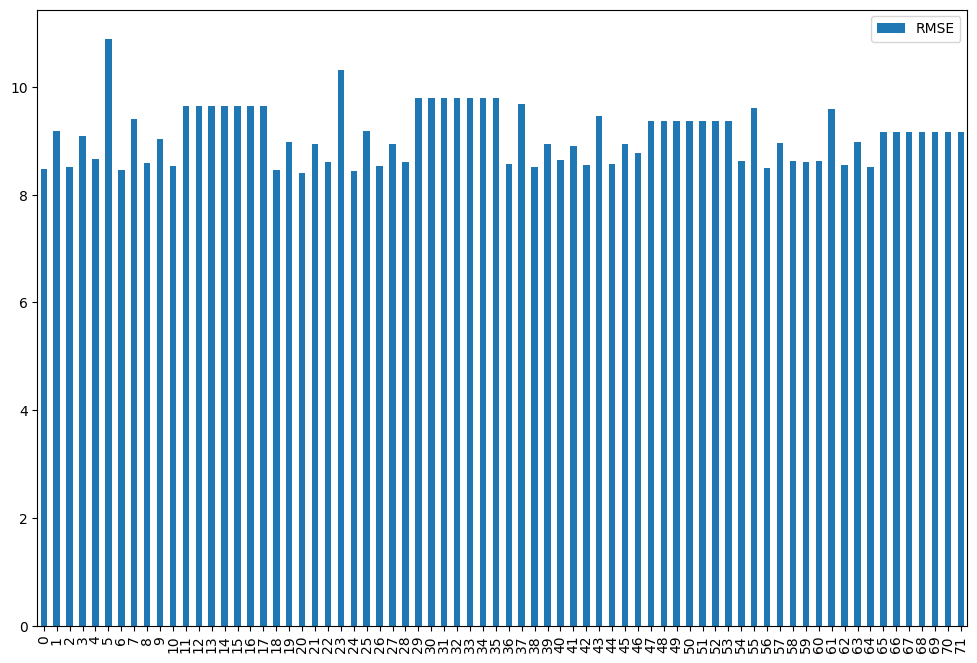

In [40]:
pred_df.plot(kind='bar', figsize=(12,8))

### Extracting results

In [41]:
pred_values_dict = {
    "review_scores_rating": df10["review_scores_rating"][X_train.index].values.tolist(),
    #"prep_duration_prediction":y_predict[:,0].tolist(),
    #"estimated_store_to_consumer_driving_duration": train_df["estimated_store_to_consumer_driving_duration"][test_indices].values.tolist(),
    #"estimated_order_place_duration": train_df["estimated_order_place_duration"][test_indices].values.tolist(),
}
values_df = pd.DataFrame.from_dict(pred_values_dict)
values_df.head(22)

,review_scores_rating
0,94.0
1,97.0
2,94.0
3,80.0
4,100.0
5,100.0
6,85.0
7,80.0
8,96.0
9,100.0
